# Apply LDA to the paragraph set to identify candidate topics

## Data wrangling
### Clean up paragraph text data. Remove punctuation; lowercase the text.

In [1]:
import pandas as pd
import string

# data wrangling/cleaning
paragraphs_df = pd.read_csv('election_paragraphs.csv', delimiter = '///', engine = 'python')

# remove punctuation
paragraphs_df['Paragraph'] = paragraphs_df['Paragraph'].apply(lambda x: ''.join([c for c in x if c not in string.punctuation]))

# lowercase paragraph text
paragraphs_df = paragraphs_df.apply(lambda x: x.str.lower())

### Results

In [2]:
paragraphs_df

,Date,Paragraph
0,2000-05-01,following are excerpts from remarks prepared f...
1,2000-05-01,from what we can tell of his foreign policy go...
2,2000-05-01,governor bush dangerously fixates on the cold ...
3,2000-05-01,stuck in a cold war mindset governor bush cont...
4,2000-05-01,just this past week governor bush used his bri...
...,...,...
3168,2000-07-02,thats not to say that mr gores answers were ve...
3169,2000-07-02,mr gore is not alone in having questions raise...
3170,2000-07-02,mr gore was in fact tolerably forthcoming as f...
3171,2000-07-02,but in the face of an impressive series of doc...


### Vectorizing the text

In [4]:
import pandas as pd

# helper function: returns the k most frequently appearing keywords in the dataframe
def top_k(data_df, vec, k):
    X = vec.fit_transform(data_df['Paragraph'].values)
    labels = vec.get_feature_names()
    
    return pd.DataFrame(columns = labels, data = X.toarray()).sum().sort_values(ascending = False)[:k]

In [5]:
## generate feature vectors
from sklearn.feature_extraction.text import CountVectorizer 

vec = CountVectorizer(decode_error = 'ignore', stop_words = 'english')
X = vec.fit_transform(paragraphs_df['Paragraph'].values)

#### Most frequent terms over all paragraphs

In [6]:
top_terms = top_k(paragraphs_df, vec, 30)

top_terms

mr              4017
bush            2046
gore            1863
said            1389
president        787
campaign         604
bushs            548
vice             478
gores            467
george           432
al               377
security         355
governor         345
today            331
republican       328
social           327
texas            315
new              290
people           266
clinton          248
gov              246
plan             241
years            240
like             238
national         230
presidential     220
political        213
policy           204
tax              204
did              203
dtype: int64

## Topic modeling with LDA

In [7]:
# helper function: prints the top k candidate topics
def print_topics(topic_model, vec, k):
    terms = vec.get_feature_names()
    for topic_idx, topic in enumerate(topic_model.components_):
        print("Topic #%d:" %topic_idx)
        print(" ".join([terms[i] for i in topic.argsort()[:-k - 1:-1]]) + '\n')

In [8]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

tn = 30
lda = LDA(n_components = tn)
lda.fit(X)

LatentDirichletAllocation(n_components=30)

### Candidate topics

In [9]:
print_topics(lda, vec, 10)

Topic #0:
gore mr bush president george vice al gov said texas

Topic #1:
mr bush said gore republican president texas george campaign years

Topic #2:
mr gore bush said president bushs vice campaign al people

Topic #3:
mr gore bush said president clinton vice did dont say

Topic #4:
mr bush gore said republican money like time party soft

Topic #5:
mr gore said bush president new like clinton al bushs

Topic #6:
death mr bush penalty texas case governor board execution reprieve

Topic #7:
labor trade mr china president gore workers union support today

Topic #8:
mr bush gore said mccain governor house president bushs gores

Topic #9:
mr gore tax said bush years billion plan federal gores

Topic #10:
mr bush gore president governor vice campaign years running gores

Topic #11:
mr bush said gore republican bushs party george campaign governor

Topic #12:
mr gore bush president vice clinton said policy al just

Topic #13:
mr bush gore said bushs george campaign nuclear president gov

To

In [29]:
# transform document word matrix according to the fitted LDA model
document_topic_distribution = lda.transform(X)
document_topic_df = pd.DataFrame(document_topic_distribution)
document_topic_df['Date'] = paragraphs_df['Date']

topic_coverage = document_topic_df.groupby(['Date']).agg({i: 'sum' for i in range(30)})

### Topic coverage results

In [30]:
topic_coverage

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Date,,,,,,,,,,,,,,,,,,,,,
2000-05-01,0.082633,1.581086,2.485042,0.334360,1.820424,0.082633,0.082633,0.700719,5.192109,0.726548,...,0.229697,1.229181,15.187484,3.949629,2.855252,1.011205,0.876176,3.303379,3.058931,0.594384
2000-05-02,0.030056,0.030056,0.332909,0.958627,1.117452,0.030056,1.248859,0.030056,2.721092,0.030056,...,0.310912,0.030056,0.598380,1.913389,0.030056,0.030056,0.030056,0.030056,4.508386,0.030056
2000-05-03,1.988951,0.068363,0.622456,1.542549,0.773358,1.035030,0.127626,1.018363,1.439720,4.547652,...,1.039739,2.084444,9.256134,2.857331,0.544400,4.866923,0.497518,1.302592,5.047752,0.967433
2000-05-05,0.110026,4.561487,1.256749,3.359198,1.066547,2.979433,0.895345,1.997128,4.434635,1.135205,...,5.110260,0.483352,5.253112,6.381480,5.508463,1.208977,1.043359,1.675017,1.651182,2.038231
2000-05-06,0.366716,0.060687,1.943040,2.008821,1.008056,1.990317,0.060687,1.133910,0.623816,1.240176,...,3.321236,0.275505,1.552261,4.109743,1.603103,0.060687,0.994021,5.372571,2.706065,0.994021
2000-05-07,0.012860,0.012860,0.402266,1.965316,0.012860,0.941432,0.012860,0.012860,2.474297,0.179486,...,0.967406,0.012860,1.963161,0.992860,0.012860,0.984289,0.012860,0.012860,1.218923,0.012860
2000-05-08,1.931743,0.059689,1.026356,1.031911,1.030277,0.059689,0.059689,0.059689,3.254396,0.394858,...,1.180730,0.997189,3.705794,2.819510,0.059689,1.237317,1.009689,2.913354,0.531078,0.998724
2000-05-09,0.063562,2.453490,1.035784,0.485277,0.328238,0.653833,0.063562,3.324400,5.323844,2.013742,...,1.590557,0.063562,1.072670,4.844817,0.063562,1.994694,5.706783,5.201205,3.075226,0.063562
2000-05-10,0.114325,1.946386,0.875354,4.898577,0.949344,0.114325,0.407401,2.725886,9.619258,0.114325,...,4.284913,1.439769,1.214273,6.614356,1.343640,1.079842,2.954651,4.290242,4.846856,1.088009


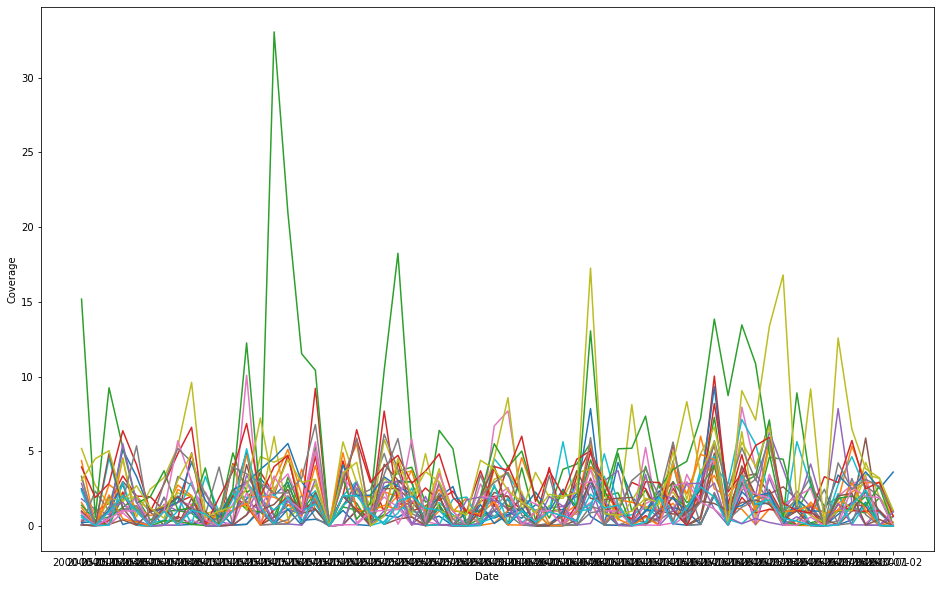

In [52]:
import matplotlib.pyplot as plt

plt.plot(topic_coverage)
plt.ylabel('Coverage')
plt.xlabel('Date')
plt.show()

# Iowa Electronic Markets (IEM) 2000 Presidential Winner-Takes-All Market

## Data wrangling

In [61]:
import datetime 

# helper function to standardize date formatting between datasets
def format_date(date):
    return datetime.datetime.strptime(date, '%m/%d/%y').strftime('20%y-%m-%d')

In [64]:
import pandas as pd

iem_prices_df = pd.read_csv('iem_2000.txt', delimiter = '\t')
iem_prices_df = iem_prices_df.drop(['    Units', '    $Volume', '    LowPrice', '    HighPrice', '    AvgPrice'], axis = 1)
iem_prices_df['Date'] = iem_prices_df['Date'].apply(lambda x: format_date(x))
iem_prices_df = iem_prices_df.set_index('Date')

### Democratic candidate prices 

In [65]:
dem_prices_df = iem_prices_df[iem_prices_df['    Contract'].str.contains('Dem')]
dem_prices_df

,Contract,LastPrice
Date,,
2000-05-01,Dem,0.550
2000-05-02,Dem,0.508
2000-05-03,Dem,0.510
2000-05-04,Dem,0.513
2000-05-05,Dem,0.524
...,...,...
2000-10-27,Dem,0.387
2000-10-28,Dem,0.287
2000-10-29,Dem,0.354


### Republican candidate prices

In [66]:
rep_prices_df = iem_prices_df[iem_prices_df['    Contract'].str.contains('Rep')]
rep_prices_df

,Contract,LastPrice
Date,,
2000-05-01,Rep,0.500
2000-05-02,Rep,0.498
2000-05-03,Rep,0.491
2000-05-04,Rep,0.490
2000-05-05,Rep,0.482
...,...,...
2000-10-27,Rep,0.620
2000-10-28,Rep,0.681
2000-10-29,Rep,0.670


In [73]:
dem_normalized_prices = dem_prices_df['    LastPrice'] / (dem_prices_df['    LastPrice'] + rep_prices_df['    LastPrice'])
dem_normalized_prices_df = dem_normalized_prices.to_frame()
dem_normalized_prices_df = dem_normalized_prices_df.rename(columns = {'    LastPrice': 'NormalizedPrice'})
dem_normalized_prices_df

,NormalizedPrice
Date,
2000-05-01,0.523810
2000-05-02,0.504970
2000-05-03,0.509491
2000-05-04,0.511466
2000-05-05,0.520875
...,...
2000-10-27,0.384310
2000-10-28,0.296488
2000-10-29,0.345703


## Election coverage vs. election forecast

In [83]:
election_prices_topics = pd.concat([dem_normalized_prices_df, topic_coverage], axis = 1, join = 'inner')

election_prices_topics

,NormalizedPrice,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
Date,,,,,,,,,,,,,,,,,,,,,
2000-05-01,0.523810,0.082633,1.581086,2.485042,0.334360,1.820424,0.082633,0.082633,0.700719,5.192109,...,0.229697,1.229181,15.187484,3.949629,2.855252,1.011205,0.876176,3.303379,3.058931,0.594384
2000-05-02,0.504970,0.030056,0.030056,0.332909,0.958627,1.117452,0.030056,1.248859,0.030056,2.721092,...,0.310912,0.030056,0.598380,1.913389,0.030056,0.030056,0.030056,0.030056,4.508386,0.030056
2000-05-03,0.509491,1.988951,0.068363,0.622456,1.542549,0.773358,1.035030,0.127626,1.018363,1.439720,...,1.039739,2.084444,9.256134,2.857331,0.544400,4.866923,0.497518,1.302592,5.047752,0.967433
2000-05-05,0.520875,0.110026,4.561487,1.256749,3.359198,1.066547,2.979433,0.895345,1.997128,4.434635,...,5.110260,0.483352,5.253112,6.381480,5.508463,1.208977,1.043359,1.675017,1.651182,2.038231
2000-05-06,0.515060,0.366716,0.060687,1.943040,2.008821,1.008056,1.990317,0.060687,1.133910,0.623816,...,3.321236,0.275505,1.552261,4.109743,1.603103,0.060687,0.994021,5.372571,2.706065,0.994021
2000-05-07,0.515060,0.012860,0.012860,0.402266,1.965316,0.012860,0.941432,0.012860,0.012860,2.474297,...,0.967406,0.012860,1.963161,0.992860,0.012860,0.984289,0.012860,0.012860,1.218923,0.012860
2000-05-08,0.511535,1.931743,0.059689,1.026356,1.031911,1.030277,0.059689,0.059689,0.059689,3.254396,...,1.180730,0.997189,3.705794,2.819510,0.059689,1.237317,1.009689,2.913354,0.531078,0.998724
2000-05-09,0.510000,0.063562,2.453490,1.035784,0.485277,0.328238,0.653833,0.063562,3.324400,5.323844,...,1.590557,0.063562,1.072670,4.844817,0.063562,1.994694,5.706783,5.201205,3.075226,0.063562
2000-05-10,0.500000,0.114325,1.946386,0.875354,4.898577,0.949344,0.114325,0.407401,2.725886,9.619258,...,4.284913,1.439769,1.214273,6.614356,1.343640,1.079842,2.954651,4.290242,4.846856,1.088009


# Granger testing

In [171]:
from statsmodels.tsa.stattools import grangercausalitytests as gct

lag = 3
granger_test_results = list()
for i in range(0, len(election_prices_topics.columns) - 1):
    result = gct(election_prices_topics[['NormalizedPrice', i]], maxlag = lag, verbose = True)
    granger_test_results.append(result)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1138  , p=0.7372  , df_denom=54, df_num=1
ssr based chi2 test:   chi2=0.1201  , p=0.7289  , df=1
likelihood ratio test: chi2=0.1200  , p=0.7291  , df=1
parameter F test:         F=0.1138  , p=0.7372  , df_denom=54, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0624  , p=0.9396  , df_denom=51, df_num=2
ssr based chi2 test:   chi2=0.1369  , p=0.9338  , df=2
likelihood ratio test: chi2=0.1368  , p=0.9339  , df=2
parameter F test:         F=0.0624  , p=0.9396  , df_denom=51, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0609  , p=0.9801  , df_denom=48, df_num=3
ssr based chi2 test:   chi2=0.2094  , p=0.9761  , df=3
likelihood ratio test: chi2=0.2090  , p=0.9761  , df=3
parameter F test:         F=0.0609  , p=0.9801  , df_denom=48, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6102  , p=0.2099  , df_d

likelihood ratio test: chi2=1.8010  , p=0.4064  , df=2
parameter F test:         F=0.8334  , p=0.4404  , df_denom=51, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3377  , p=0.2732  , df_denom=48, df_num=3
ssr based chi2 test:   chi2=4.5983  , p=0.2037  , df=3
likelihood ratio test: chi2=4.4162  , p=0.2199  , df=3
parameter F test:         F=1.3377  , p=0.2732  , df_denom=48, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2168  , p=0.6434  , df_denom=54, df_num=1
ssr based chi2 test:   chi2=0.2288  , p=0.6324  , df=1
likelihood ratio test: chi2=0.2283  , p=0.6328  , df=1
parameter F test:         F=0.2168  , p=0.6434  , df_denom=54, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1653  , p=0.8481  , df_denom=51, df_num=2
ssr based chi2 test:   chi2=0.3629  , p=0.8340  , df=2
likelihood ratio test: chi2=0.3618  , p=0.8345  , df=2
parameter F test:         F=0.1653  , p=0.848

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0150  , p=0.9030  , df_denom=54, df_num=1
ssr based chi2 test:   chi2=0.0158  , p=0.8999  , df=1
likelihood ratio test: chi2=0.0158  , p=0.8999  , df=1
parameter F test:         F=0.0150  , p=0.9030  , df_denom=54, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4710  , p=0.2393  , df_denom=51, df_num=2
ssr based chi2 test:   chi2=3.2305  , p=0.1988  , df=2
likelihood ratio test: chi2=3.1408  , p=0.2080  , df=2
parameter F test:         F=1.4710  , p=0.2393  , df_denom=51, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1573  , p=0.3358  , df_denom=48, df_num=3
ssr based chi2 test:   chi2=3.9782  , p=0.2638  , df=3
likelihood ratio test: chi2=3.8409  , p=0.2792  , df=3
parameter F test:         F=1.1573  , p=0.3358  , df_denom=48, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3289  , p=0.5687  , df_de

# Significant causal words

## Compute average p-values across time lags

In [176]:
p_values = dict()

for i in range(len(granger_test_results)):
    p_value = 0
    for j in range(1, lag):
        p_value += granger_test_results[i][j][0]['params_ftest'][1]
    p_value /= lag
    p_values[i] = p_value
                
p_values

{0: 0.5589424121466374,
 1: 0.24342682428581539,
 2: 0.2543149727423161,
 3: 0.03386523665745627,
 4: 0.2878841772280275,
 5: 0.6418526515177958,
 6: 0.4088108527264394,
 7: 0.43253920614373387,
 8: 0.32445408807085124,
 9: 0.22242007643561193,
 10: 0.3875435796605459,
 11: 0.4971710077051008,
 12: 0.604249481004223,
 13: 0.54926182448992,
 14: 0.49996297357611147,
 15: 0.22722619571704458,
 16: 0.23315771857274178,
 17: 0.5618629716966607,
 18: 0.30264722017465306,
 19: 0.5302284257477373,
 20: 0.09503626367458584,
 21: 0.29706509298634903,
 22: 0.3807537189419295,
 23: 0.2538044105874174,
 24: 0.03302507551743527,
 25: 0.1769061548294569,
 26: 0.5277105035038909,
 27: 0.12918583376211867,
 28: 0.5798749764041994,
 29: 0.5381659736507896}

## Terms sorted by causality probability

In [184]:
p_values = dict(sorted(p_values.items(), key = lambda entry: entry[1]))

p_values

{24: 0.03302507551743527,
 3: 0.03386523665745627,
 20: 0.09503626367458584,
 27: 0.12918583376211867,
 25: 0.1769061548294569,
 9: 0.22242007643561193,
 15: 0.22722619571704458,
 16: 0.23315771857274178,
 1: 0.24342682428581539,
 23: 0.2538044105874174,
 2: 0.2543149727423161,
 4: 0.2878841772280275,
 21: 0.29706509298634903,
 18: 0.30264722017465306,
 8: 0.32445408807085124,
 22: 0.3807537189419295,
 10: 0.3875435796605459,
 6: 0.4088108527264394,
 7: 0.43253920614373387,
 11: 0.4971710077051008,
 14: 0.49996297357611147,
 26: 0.5277105035038909,
 19: 0.5302284257477373,
 29: 0.5381659736507896,
 13: 0.54926182448992,
 0: 0.5589424121466374,
 17: 0.5618629716966607,
 28: 0.5798749764041994,
 12: 0.604249481004223,
 5: 0.6418526515177958}

# Prior influence

## Positive impact terms

In [204]:
list(p_values)[:15]

[24, 3, 20, 27, 25, 9, 15, 16, 1, 23, 2, 4, 21, 18, 8]

## Negative impact terms

In [205]:
list(p_values)[15:]

[22, 10, 6, 7, 11, 14, 26, 19, 29, 13, 0, 17, 28, 12, 5]

# Visualization

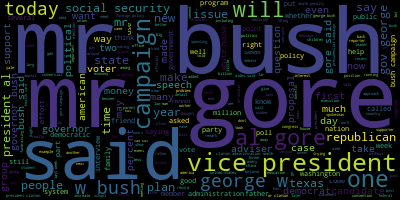

In [206]:
from wordcloud import WordCloud

all_paragraphs = ' '.join(list(paragraphs_df['Paragraph'].values))
wordcloud = WordCloud(max_words = 300)
wordcloud.generate(all_paragraphs)
wordcloud.to_image()